<a href="https://colab.research.google.com/github/Anthonysokolov/fashion-image-classifier/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying images of clothing using Tensorflow

## Dataset: Fashion MNIST

In [0]:
# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Load data

In [0]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.fashion_mnist.load_data()

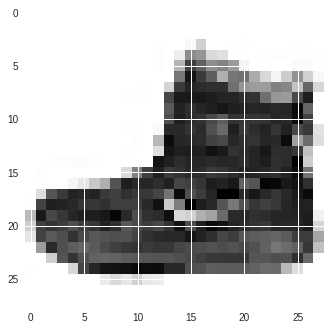

In [3]:
# Display sample image from dataset
plt.imshow(xtrain[0])

In [0]:
# Normalize data
xtrain = xtrain/255
xtest = xtest/255

In [0]:
# Reshape data
xtrain = np.reshape(xtrain,(xtrain.shape[0],28,28,1))
xtest = np.reshape(xtest,(xtest.shape[0],28,28,1))

## Construct model

In [0]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)))

model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Conv2D(64, (3,3), activation = 'relu'))

model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))

model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [0]:
# Define callback to end training if accuracy is below certain value
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    # Check if accuracy is above a certain threshold after each epoch
    if(logs['acc'] > 0.95):
      print("\nTarget accuracy reached!")
      self.model.stop_training = True
      
callbacks = myCallback()

In [44]:
model.fit(xtrain,ytrain,epochs = 10, validation_data = (xtest,ytest), callbacks = [callbacks])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 262us/sample - loss: 0.4405 - acc: 0.8405 - val_loss: 0.3642 - val_acc: 0.8700
Epoch 2/10
60000/60000 [==============================] - 15s 257us/sample - loss: 0.2963 - acc: 0.8923 - val_loss: 0.3068 - val_acc: 0.8823
Epoch 3/10
60000/60000 [==============================] - 15s 258us/sample - loss: 0.2529 - acc: 0.9069 - val_loss: 0.2758 - val_acc: 0.8983
Epoch 4/10
60000/60000 [==============================] - 15s 256us/sample - loss: 0.2189 - acc: 0.9193 - val_loss: 0.2774 - val_acc: 0.8969
Epoch 5/10
60000/60000 [==============================] - 15s 257us/sample - loss: 0.1903 - acc: 0.9291 - val_loss: 0.2524 - val_acc: 0.9069
Epoch 6/10
60000/60000 [==============================] - 15s 256us/sample - loss: 0.1689 - acc: 0.9366 - val_loss: 0.2708 - val_acc: 0.9040
Epoch 7/10
60000/60000 [==============================] - 15s 256us/sample - loss: 0.1464 - acc: 0.9441 

In [45]:
model.evaluate(xtest,ytest)

10000/10000 [==============================] - 1s 103us/sample - loss: 0.2636 - acc: 0.9118


[0.2636492225348949, 0.9118]

## Display model predictions

In [0]:
# Create dict of model outputs and their corresponding labels
label_dict = {
 0: "T-shirt",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}


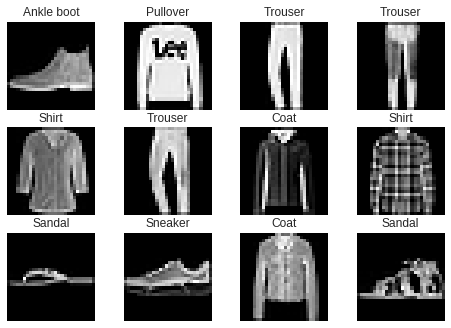

In [54]:
# Plot images from test set and their corresponding predictions
fig = plt.figure()

for img,i in zip(xtest[:12],range(1,13)):
  pred = np.argmax(model.predict([[img]])[0])
  sub = fig.add_subplot(3,4,i)
  sub.imshow(img.reshape(28,28),cmap = 'gray')
  plt.title(label_dict[pred])
  
  sub.axes.get_xaxis().set_visible(False)
  sub.axes.get_yaxis().set_visible(False)
  
plt.show()